In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv(r"C:\Users\PRASA\Downloads\playgolf_data.csv")

In [5]:
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [15]:
df.describe()

,Outlook,Temperature,Humidity,Wind,PlayGolf
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [21]:
gd_encode = pd.get_dummies(df,columns = ['Outlook','Temperature','Humidity','Wind'],dtype = 'int')

In [23]:
gd_encode

,PlayGolf,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,No,0,0,1,0,1,0,1,0,0,1
1,No,0,0,1,0,1,0,1,0,1,0
2,Yes,1,0,0,0,1,0,1,0,0,1
3,Yes,0,1,0,0,0,1,1,0,0,1
4,Yes,0,1,0,1,0,0,0,1,0,1
5,No,0,1,0,1,0,0,0,1,1,0
6,Yes,1,0,0,1,0,0,0,1,1,0
7,No,0,0,1,0,0,1,1,0,0,1
8,Yes,0,0,1,1,0,0,0,1,0,1
9,Yes,0,1,0,0,0,1,0,1,0,1


In [25]:
x = gd_encode.drop('PlayGolf',axis=1)
x

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [29]:
y = gd_encode['PlayGolf'].apply(lambda x:1 if x=='Yes' else 0)
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayGolf, dtype: int64

In [31]:
#DATA VALIDATION
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [33]:
print(x_train,x_test,y_train,y_test)

    Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temperature_Cool  \
12                 1              0              0                 0   
5                  0              1              0                 1   
8                  0              0              1                 1   
2                  1              0              0                 0   
1                  0              0              1                 0   
13                 0              1              0                 0   
4                  0              1              0                 1   
7                  0              0              1                 0   
10                 0              0              1                 0   
3                  0              1              0                 0   
6                  1              0              0                 1   

    Temperature_Hot  Temperature_Mild  Humidity_High  Humidity_Normal  \
12                1                 0              0          

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=42)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [42]:
y_pred

array([1, 1, 0], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [58]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [60]:
from sklearn import tree

[Text(0.5555555555555556, 0.9, 'Outlook_Overcast <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]\nclass = yes'),
 Text(0.4444444444444444, 0.7, 'Humidity_Normal <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = no'),
 Text(0.2222222222222222, 0.5, 'Outlook_Rainy <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = no'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(0.3333333333333333, 0.3, 'Wind_Strong <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(0.4444444444444444, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.6666666666666666, 0.5, 'Wind_Strong <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = yes'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.7777777777777778, 0.3, 'Outlook_Sunny <= 0.5\nentropy = 1.0\

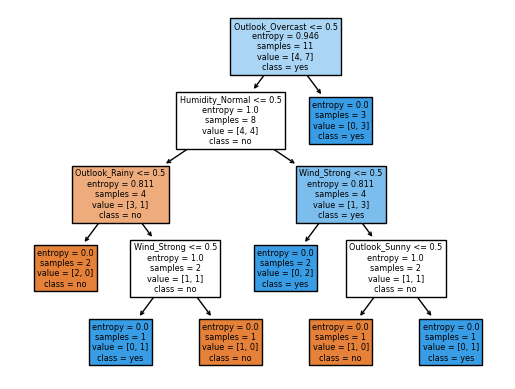

In [66]:
tree.plot_tree(dtc,feature_names=list(x.columns),class_names=['no','yes'],filled=True)